# Exploratory Data Analysis

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from wordcloud import WordCloud

### Importing the data

In [ ]:
df = pd.read_csv("TMDB_movies.csv")

In [ ]:
df.shape

(4803, 20)

Some initial modifications on our dataframe to improve the format of our data.

In [ ]:
df.dropna(axis = 0, how = 'any', subset = ['release_date',], inplace = True)
# droping only this because it is the data that I use in wich NA can be an issue

In [ ]:
df.genres = df.genres.apply(lambda x: x.split('"')[5::6])
df.keywords = df.keywords.apply(lambda x: x.split('"')[5::6])
df.production_companies =  df.production_companies.apply(lambda x: x.split('"')[3::6])
df.production_countries = df.production_countries.apply(lambda x: x.split('"')[7::8])
df.spoken_languages = df.spoken_languages.apply(lambda x: x.split('"')[3::8])

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

### Data quality control (it is not necessary to run this section )
Looking for nulls, checking data types...   
(The necessary bits have been taken out so there is no need to run this. I just left it in the notebook because I did check some things)

In [ ]:
df.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4802 non-null   int64         
 1   genres                4802 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4802 non-null   int64         
 4   keywords              4802 non-null   object        
 5   original_language     4802 non-null   object        
 6   original_title        4802 non-null   object        
 7   overview              4799 non-null   object        
 8   popularity            4802 non-null   float64       
 9   production_companies  4802 non-null   object        
 10  production_countries  4802 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4802 non-null   int64         
 13  runtime           

#### Nulls

In [ ]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3090
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  843
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
df.isnull().sum()/4803*100

budget                   0.000000
genres                   0.000000
homepage                64.334791
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062461
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.000000
revenue                  0.000000
runtime                  0.041641
spoken_languages         0.000000
status                   0.000000
tagline                 17.551530
title                    0.000000
vote_average             0.000000
vote_count               0.000000
dtype: float64

<Axes: >

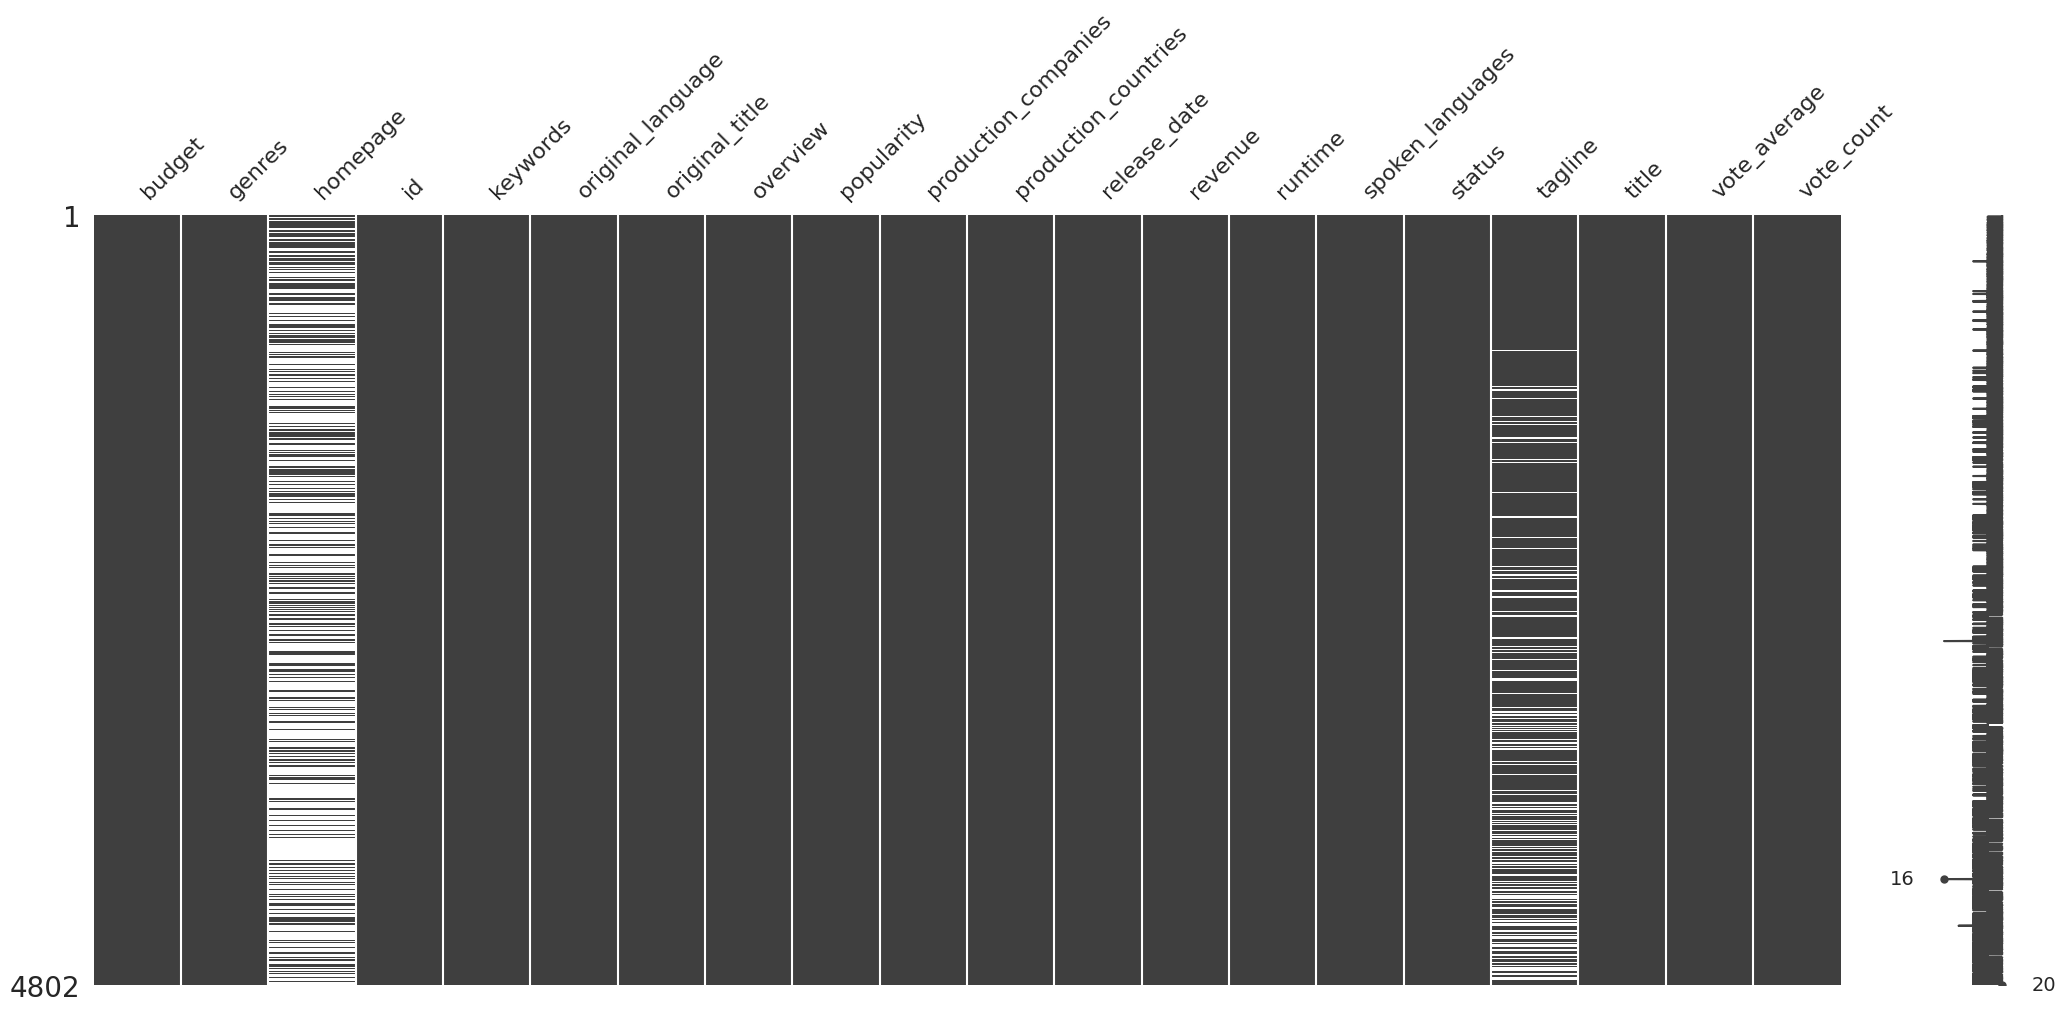

In [ ]:
msno.matrix(df)

In [ ]:
# list of id indexes where we have nulls.
# it looks like the data is missing completely at random, so we won't focus too much on the missing data.
# If the following analysis requires any of the columns with missing values and the methods don't allow nulls, we'll probbaly just droped them in columns overview, release date and rundime, since they are very insifnificant ammonuw.
# however in home page and tagline, we won't, because it is not data data we are really going to use for our analsysis.

# few
overview_null_i = list(df[df.overview.isnull()].index)
release_date_null_i = list(df[df.release_date.isnull()].index)
runtime_null_i = list(df[df.runtime.isnull()].index)
# a lot
tagline_null_i = list(df[df.tagline.isnull()].index)
homepage_null_i = list(df[df.homepage.isnull()].index)
# note: 4140 is missing in overview and runtime, the odds are few, but still not a big deal

# THE NECESSARY DROP NA HAS BEEN MOVE TO THE TOP

In [ ]:
# there is nulls that are not actually nulls are just '[]' like in production_countries. Which should be considered nulls.

In [ ]:
df[df['id'] == 53953]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1011,0,[Horror],NaN,53953,"[gore, slasher, single mother, tooth fairy, wo...",de,The Tooth Fairy,A woman and her daughter (Nicole Muñoz) encoun...,0.716764,[],[],2006-08-08,0,0.0,"[en, pl]",Released,NaN,The Tooth Fairy,4.3,13


#### Columns that are dictionaries

Columns that are a list of different lentghs of dictionaries:
```
df.genres
df.keywords
df.production_companies
df.production_countries
df.spoken_languages
```



We see some languages appear with weird charaters, let's check which different languages we have:

In [ ]:
df2 = df.copy()
df2.spoken_languages = df2.spoken_languages.apply(lambda x: x.split('"')[7::8]).copy()
set(sum(list(df2.spoken_languages) , []))

{'',
 '??????',
 'Afrikaans',
 'Bahasa indonesia',
 'Bamanankan',
 'Bosanski',
 'Catal\\u00e0',
 'Cymraeg',
 'Dansk',
 'Deutsch',
 'Eesti',
 'English',
 'Espa\\u00f1ol',
 'Esperanto',
 'Fran\\u00e7ais',
 'Gaeilge',
 'Galego',
 'Hrvatski',
 'Italiano',
 'Kiswahili',
 'Latin',
 'Magyar',
 'Nederlands',
 'No Language',
 'Norsk',
 'P\\u0443\\u0441\\u0441\\u043a\\u0438\\u0439',
 'Polski',
 'Portugu\\u00eas',
 'Rom\\u00e2n\\u0103',
 'Sloven\\u010dina',
 'Sloven\\u0161\\u010dina',
 'Somali',
 'Srpski',
 'T\\u00fcrk\\u00e7e',
 'Ti\\u1ebfng Vi\\u1ec7t',
 'Wolof',
 '\\u00cdslenska',
 '\\u010cesk\\u00fd',
 '\\u03b5\\u03bb\\u03bb\\u03b7\\u03bd\\u03b9\\u03ba\\u03ac',
 '\\u0423\\u043a\\u0440\\u0430\\u0457\\u043d\\u0441\\u044c\\u043a\\u0438\\u0439',
 '\\u0431\\u044a\\u043b\\u0433\\u0430\\u0440\\u0441\\u043a\\u0438 \\u0435\\u0437\\u0438\\u043a',
 '\\u049b\\u0430\\u0437\\u0430\\u049b',
 '\\u05e2\\u05b4\\u05d1\\u05b0\\u05e8\\u05b4\\u05d9\\u05ea',
 '\\u0627\\u0631\\u062f\\u0648',
 '\\u0627\\u0644\\u0639\

It is not good, so we will keep the languages abbreviations istead.
Also this way it is consistant with the format in column *original_language*

We will make a copy of the languages dictionaries just because some of the abbreviations are not that obvious.  We do this before changing the column *spoken_languages*

In [ ]:
languages_raw_copy = df.spoken_languages

Converting these columns into a list of just the names



In [ ]:
# THIS HAS BEEN MOVED TO THE TOP

#df.genres = df.genres.apply(lambda x: x.split('"')[5::6])
#df.keywords = df.keywords.apply(lambda x: x.split('"')[5::6])
#df.production_companies =  df.production_companies.apply(lambda x: x.split('"')[3::6])
#df.production_countries = df.production_countries.apply(lambda x: x.split('"')[7::8])
#df.spoken_languages = df.spoken_languages.apply(lambda x: x.split('"')[3::8])

#### Numerical data

In [ ]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.802000e+03,4802.000000,4802.000000,4.802000e+03,4800.000000,4802.000000,4802.000000
mean,2.905109e+07,57098.234902,21.496776,8.227777e+07,106.898125,6.093440,690.361724
std,4.072447e+07,88581.302370,31.818451,1.628697e+08,22.561593,1.191496,1234.674268
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9013.750000,4.671734,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14626.500000,12.924931,1.917498e+07,103.000000,6.200000,235.500000
75%,4.000000e+07,58589.750000,28.332017,9.291920e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#### String data

Checking if the values are unique or duplicates

In [ ]:
df.original_title.count() == len(df.original_title.unique()) # 4797

False

In [ ]:
df.title.count() == len(df.title.unique()) # 4796

False

In [ ]:
df.id.count() == len(df.id.unique())
# True

True

In [ ]:
df.duplicated(subset=['title']).sum()

3

In [ ]:
df.duplicated(subset=['original_title']).sum()

2

All id are different, however there is duplicates in title  and original_title. Let's spot them and have a look.

In [ ]:
df[df.duplicated(subset=['title'])]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2877,11000000,"[Horror, Drama, Science Fiction]",http://www.hostmovie.com/,1255,"[river, mobile phone, bravery, archer, daughte...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[Cineclick Asia, Happinet Pictures, Cheongeora...",[South Korea],2006-07-27,88489643,119.0,[ko],Released,Monsters are real.,The Host,6.7,537
3693,0,[Drama],NaN,10844,"[new zealand, gun rampage, police, independent...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],[New Zealand],2006-10-12,0,103.0,[en],Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,1377800,"[Family, Adventure, Comedy, Science Fiction, C...",NaN,2661,"[submarine, dc comics, missile, shark attack, ...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[Twentieth Century Fox Film Corporation, DC Co...",[United States of America],1966-07-30,0,105.0,[en],Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [ ]:
df[df.duplicated(subset=['original_title'])]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3693,0,[Drama],NaN,10844,"[new zealand, gun rampage, police, independent...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],[New Zealand],2006-10-12,0,103.0,[en],Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,1377800,"[Family, Adventure, Comedy, Science Fiction, C...",NaN,2661,"[submarine, dc comics, missile, shark attack, ...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[Twentieth Century Fox Film Corporation, DC Co...",[United States of America],1966-07-30,0,105.0,[en],Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [ ]:
df[df['title'] == 'Out of the Blue']
# it looks like it is remake years later

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3647,0,[Drama],NaN,39269,"[punk, independent film, coming of age, teenag...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,[Robson Street],[Canada],1980-05-01,0,94.0,[en],Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,0,[Drama],NaN,10844,"[new zealand, gun rampage, police, independent...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],[New Zealand],2006-10-12,0,103.0,[en],Released,The true story of a small town massacre,Out of the Blue,5.9,18


In [ ]:
df[df['title'] == 'The Host']
# it looks like korean version and enlish version

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
972,44000000,"[Action, Adventure, Romance, Science Fiction, ...",NaN,72710,"[based on novel, mass murder, dystopia, genoci...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[Nick Wechsler Productions, Open Road Films, S...",[United States of America],2013-03-22,63327201,125.0,[en],Released,You will be one of us,The Host,6.0,1817
2877,11000000,"[Horror, Drama, Science Fiction]",http://www.hostmovie.com/,1255,"[river, mobile phone, bravery, archer, daughte...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[Cineclick Asia, Happinet Pictures, Cheongeora...",[South Korea],2006-07-27,88489643,119.0,[ko],Released,Monsters are real.,The Host,6.7,537


In [ ]:
df[df['title'] == 'Batman']
# it looks like remake or different movies of the saga

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1359,35000000,"[Fantasy, Action]",NaN,268,"[double life, dc comics, dual identity, chemic...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[PolyGram Filmed Entertainment, The Guber-Pete...","[United Kingdom, United States of America]",1989-06-23,411348924,126.0,"[en, fr]",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
4267,1377800,"[Family, Adventure, Comedy, Science Fiction, C...",NaN,2661,"[submarine, dc comics, missile, shark attack, ...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[Twentieth Century Fox Film Corporation, DC Co...",[United States of America],1966-07-30,0,105.0,[en],Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


#### Date data

We are going to convert the datatype so we can plot it more easily and compare better

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4802 non-null   int64         
 1   genres                4802 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4802 non-null   int64         
 4   keywords              4802 non-null   object        
 5   original_language     4802 non-null   object        
 6   original_title        4802 non-null   object        
 7   overview              4799 non-null   object        
 8   popularity            4802 non-null   float64       
 9   production_companies  4802 non-null   object        
 10  production_countries  4802 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4802 non-null   int64         
 13  runtime           

# Visualisations

#### Keywords

Quick view at the usage of keywords

In [ ]:
all_keywords = sum(list(df.keywords) , [])
keywords_underscore = [k.replace(' ', '_') for k in all_keywords]
keywords_text = ' '.join(keywords_underscore)

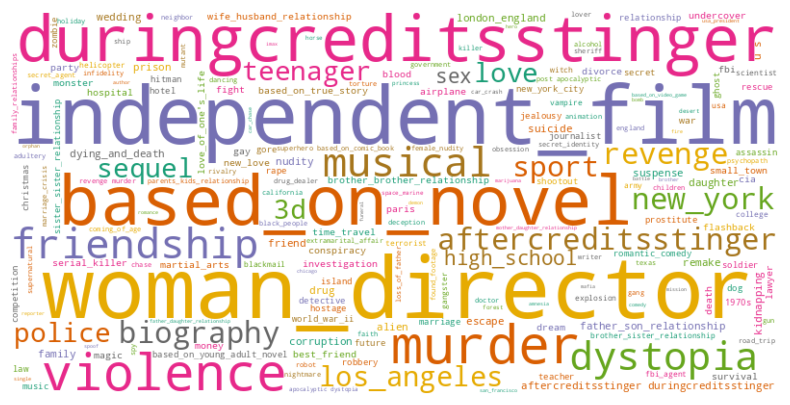

In [ ]:
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', colormap='Dark2').generate(keywords_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We do not proced with this because some of them seem a bit weird and it is not very standard.

#### Correlations

Quick overall view at the correlations of the numerical data

In [ ]:
# removing the id because it does not make sense to use it here eventhough it is a numerical column
df_no_id = df.copy()
df_no_id.drop('id', axis=1, inplace=True)

<ipython-input-211-b12e2ec5f030>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_id.corr(), cmap='icefire_r', center=0, annot=True, vmin=0, vmax=1)


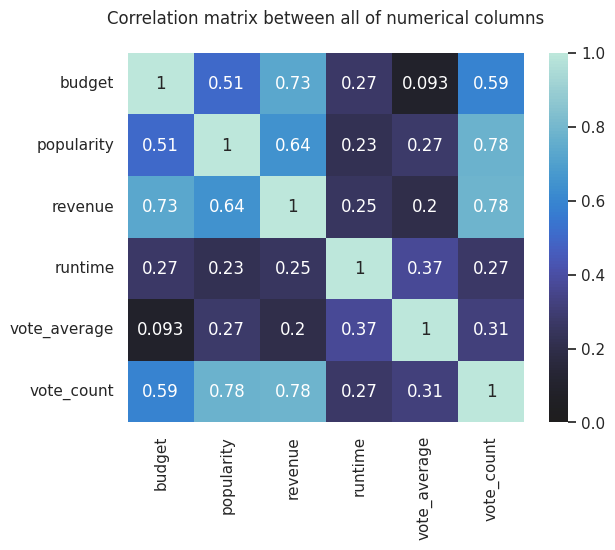

In [ ]:
plt.title('Correlation matrix between all of numerical columns\n')
sns.heatmap(df_no_id.corr(), cmap='icefire_r', center=0, annot=True, vmin=0, vmax=1)
plt.show()

We see correlation between budget, popularity, revenue and vote_count. **All** positive correlations, which make sense.

**It is interesting to see how vote_average does not correlate with anything, not popularity, not revenue, nor budget, as we could have expected. Not even vote_count**

Now, to see the correlations a bit better and account visually for the spread:

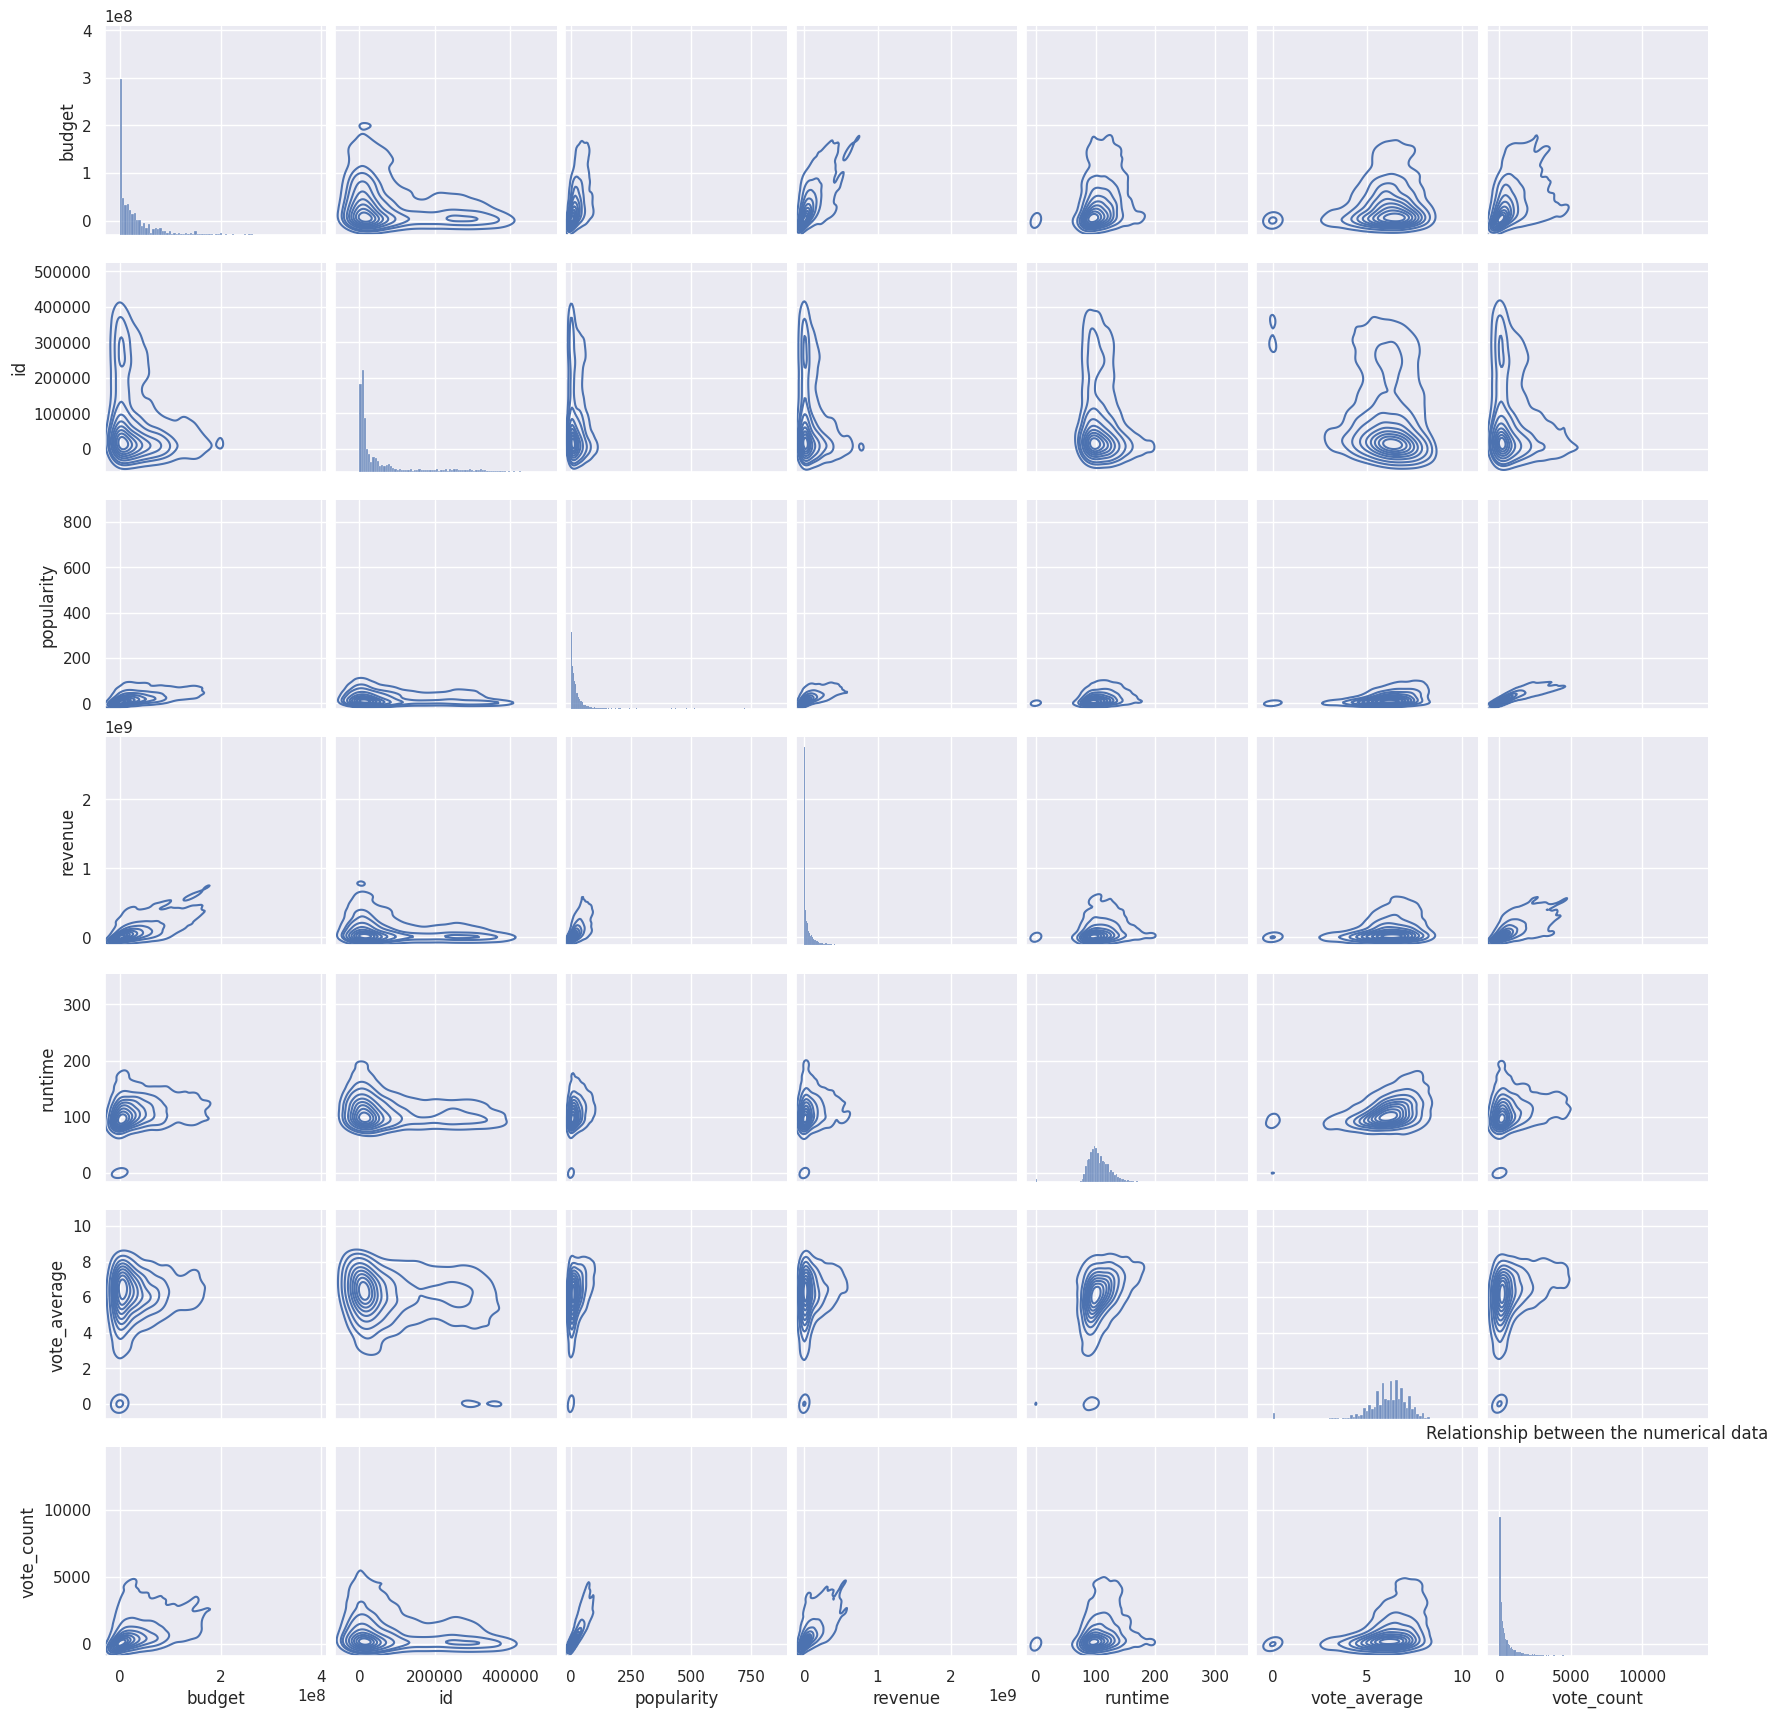

In [ ]:
sns.set_theme(style="darkgrid")
sns.pairplot(df,kind="kde", diag_kind="hist")
plt.title('Relationship between the numerical data')
plt.show()

#### Vicennials

We divided the data in vicennials (two decades) to analyse the differences in correlation with time

We compute the profit assuming budget = cost, which is fairly accurate in the film industry.

In [ ]:
df['profit'] = df['revenue'] - df['budget']

In [ ]:
# Creation of vicennial buckets
vicennials = ['1916-01-01', '1940-01-01', '1960-01-01', '1980-01-01', '2000-01-01', '2020-01-01']  # Dates as strings
vicennials_name = ['1916-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']  # Category names

# Convert vicenials to datetime
vicennials = pd.to_datetime(vicennials)

df['vicennials'] = pd.cut(df['release_date'],
                         bins=vicennials,
                         labels=vicennials_name,
                         include_lowest=True)

In [ ]:
df.sort_values('release_date', inplace=True); # to make sure the line graph shows correctly

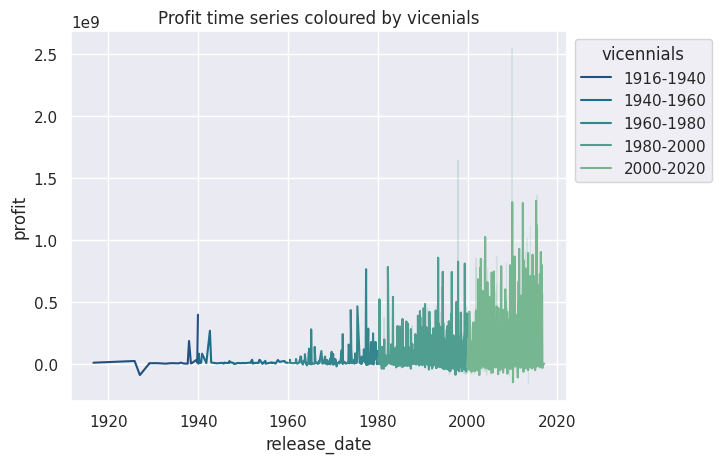

In [ ]:
plt.title('Profit time series coloured by vicenials')
ax = sns.lineplot(data = df, x = 'release_date', y = 'profit', hue='vicennials', palette='crest_r')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Now we group the dataframe according to the vicennials to then get the correlation between Revenue and Budget, and Revenue and Popularity

In [ ]:
df_grouped_vic = df.groupby('vicennials')[['budget', 'revenue', 'profit']].median().copy()

In [ ]:
# Correlation Between Revenue and Budget Across Vicennials
correlations = df.groupby('vicennials').apply(lambda g: g['revenue'].corr(g['budget']))
correlations = correlations.reset_index(name='correlation')

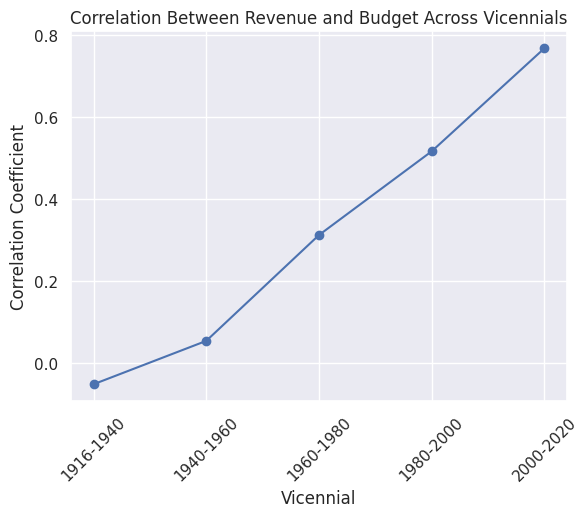

In [ ]:
plt.plot(correlations['vicennials'], correlations['correlation'], marker='o')
plt.title('Correlation Between Revenue and Budget Across Vicennials')
plt.xlabel('Vicennial')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Correlation Between Popularity and Budget Across Vicennials
correlations2 = df.groupby('vicennials').apply(lambda g: g['popularity'].corr(g['budget']))
correlations2 = correlations2.reset_index(name='correlation')

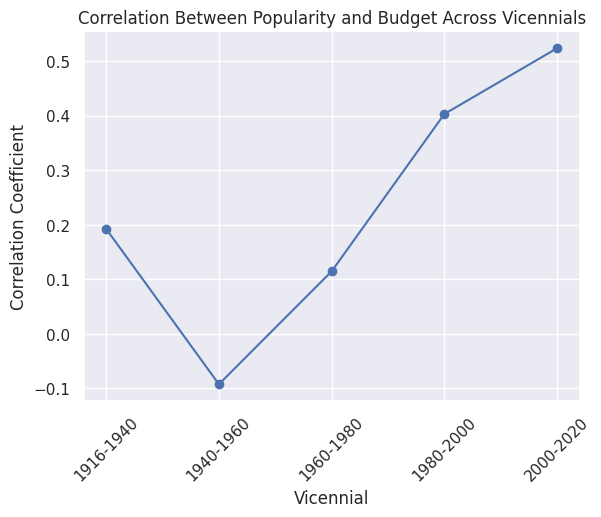

In [ ]:
plt.plot(correlations2['vicennials'], correlations2['correlation'], marker='o')
plt.title('Correlation Between Popularity and Budget Across Vicennials')
plt.xlabel('Vicennial')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**KEY POINT 1:
We could think that with the rise of social media films with less budget could reach high popularity. However it looks like we are more influenced than ever by high budgets because budget and popularity are more correlated**

It would be interesting to look at the spread as well as we expect that in recent times there might be more spread accounting for the effects of social media.

#### Explode Genres

We want to look at our data using the genres. For that we expand (explode) the dataframe creating as many new duplicate rows for each film as genres it is categorised in.

In [ ]:
# Explode the 'genres' column
df_exploded = df.explode('genres')
df_exploded = df_exploded.reset_index(drop=True)
df_exploded.sort_values('release_date', inplace=True);

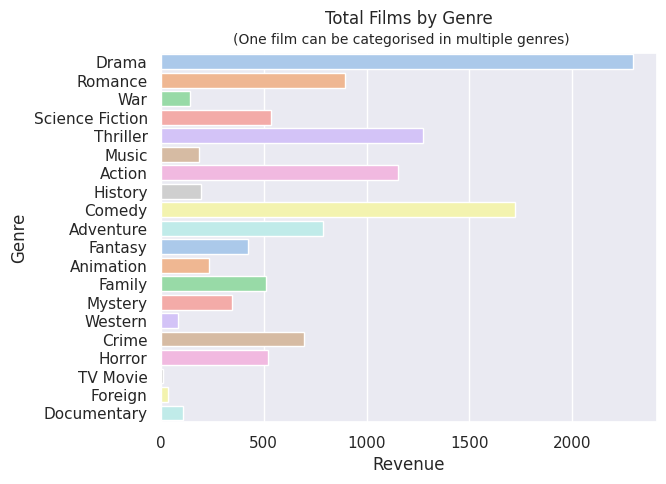

In [ ]:
sns.countplot(y='genres', data=df_exploded, hue='genres', legend=False, palette='pastel')

plt.title('Total Films by Genre\n')
plt.text(0.5, 0.89, '(One film can be categorised in multiple genres)\n', fontsize=10, ha='center', va='center', transform=plt.gcf().transFigure)

plt.xlabel('Revenue')
plt.ylabel('Genre')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

The ammount of films in each Genre varies a lot so we need to keep this in mind going forward

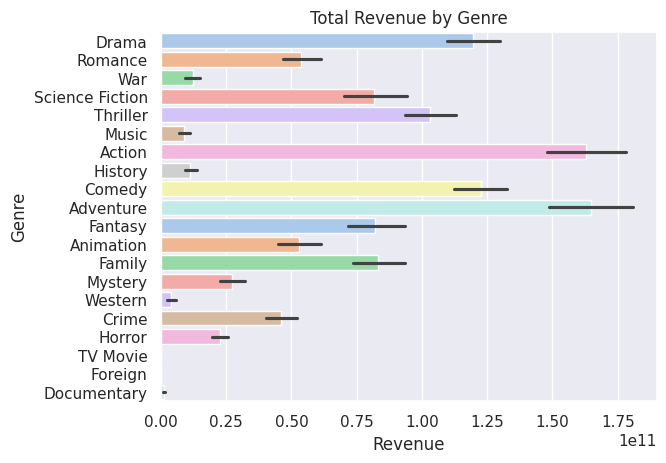

In [ ]:
# EXTRA
sns.barplot(x='revenue', y='genres', data=df_exploded, estimator=sum, hue='genres', legend=False, palette='pastel')

plt.title('Total Revenue by Genre')
plt.xlabel('Revenue')
plt.ylabel('Genre')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

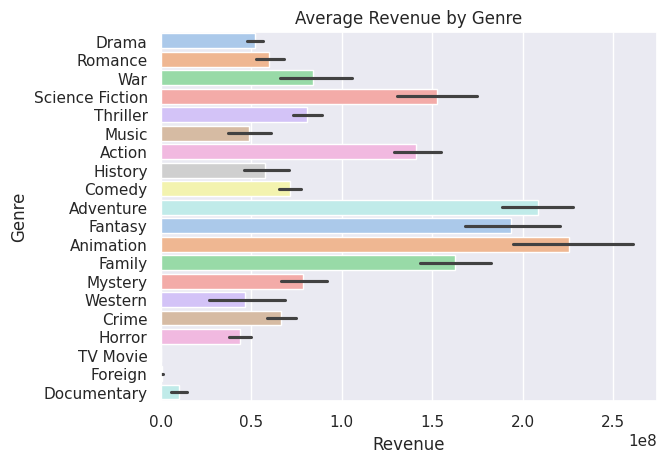

In [ ]:
# EXTRA
sns.barplot(x='revenue', y='genres', data=df_exploded, estimator=np.mean, hue='genres', legend=False, palette='pastel')

plt.title('Average Revenue by Genre')
plt.xlabel('Revenue')
plt.ylabel('Genre')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

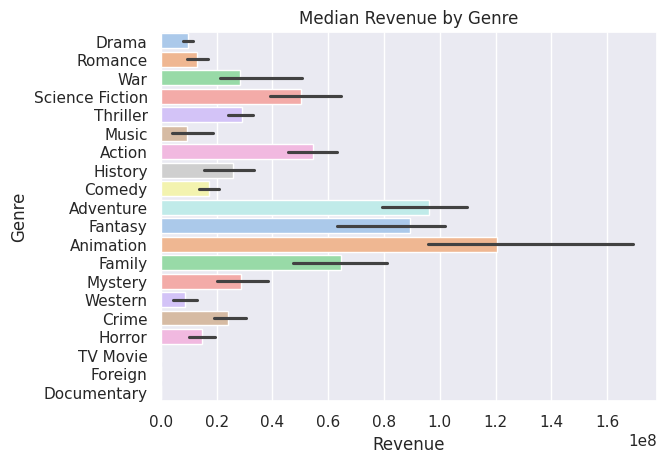

In [ ]:
# EXTRA

sns.barplot(x='revenue', y='genres', data=df_exploded, estimator=np.median, hue='genres', legend=False, palette='pastel')

plt.title('Median Revenue by Genre')
plt.xlabel('Revenue')
plt.ylabel('Genre')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

<ipython-input-216-c3d7f5026713>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='revenue', y='genres', data=df_exploded, palette='pastel')


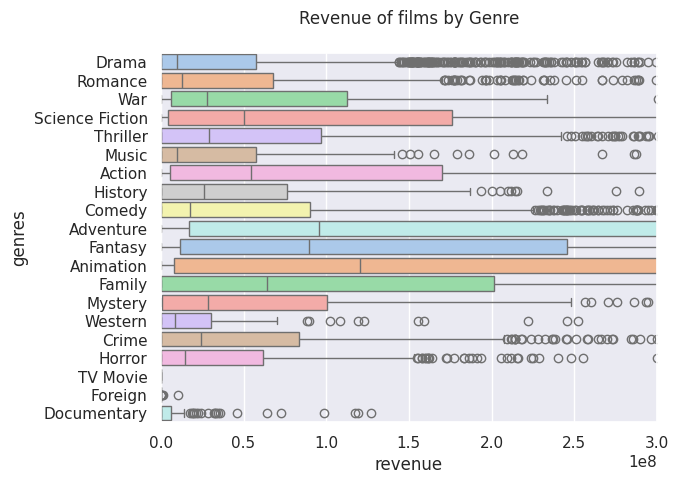

In [ ]:
# EXTRA

plt.title('Revenue of films by Genre\n')
sns.boxplot(x='revenue', y='genres', data=df_exploded, palette='pastel')
plt.xlim(0, 3e+08)
plt.show()

Because there is a lot of outliers it might be more accurate to look at medians rather than means when comparing.

In [ ]:
# Now compute the correlations
correlations_by_genre = (df_exploded
                         .groupby(['vicennials', 'genres'])
                         .apply(lambda g: g['popularity'].corr(g['budget']))
                         .reset_index(name='correlation'))

correlations_by_genre.dropna(axis = 0, how = 'any', subset = ['correlation',], inplace = True)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


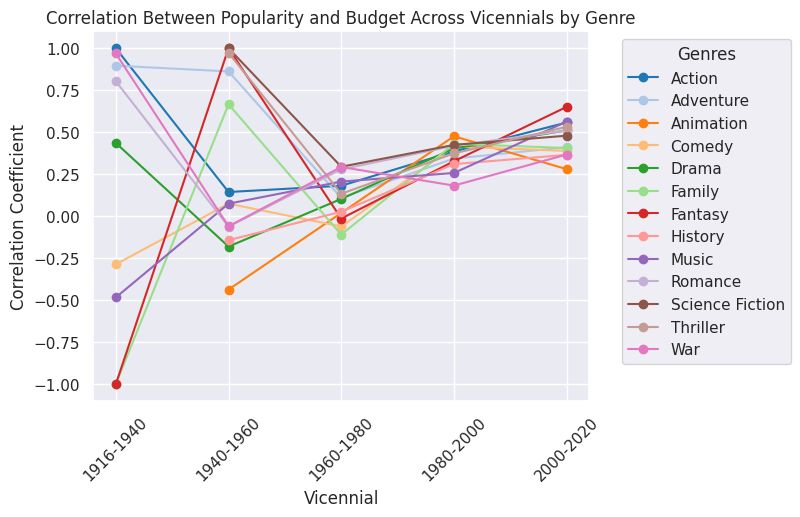

In [ ]:
sns.set_palette('tab20')

for genre in genres_with_all_vicennials:
    genre_data = correlations_by_genre[correlations_by_genre['genres'] == genre]
    plt.plot(genre_data['vicennials'], genre_data['correlation'], marker='o', label=genre)

plt.title('Correlation Between Popularity and Budget Across Vicennials by Genre')
plt.xlabel('Vicennial')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**KEYPOINT: Different genres showed a lot of variability in how bugget was converted into popularity but as time goes by, we see similar conversions regardless of genre.** In a way it shows by vicenial how well of a predictor of success was the budget.


Bedore the 60s, Adventure, Action, War, Romance had remarkable positive correlations. Whereas Fantasy, Family, Comedy or Music showed negative correlations. We should also consider that the more back in time the less data we have, so that might explain such strong correlations. After 1980 all show positive correlations, but not as strong as before the 60s

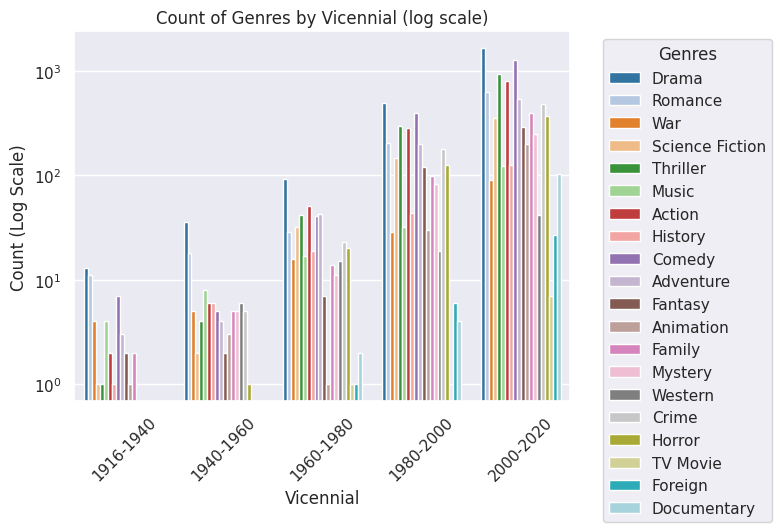

In [ ]:
ax = sns.countplot(data=df_exploded, x='vicennials', hue='genres')
plt.title('Count of Genres by Vicennial (log scale)')
plt.xlabel('Vicennial')
plt.ylabel('Count (Log Scale)')
plt.xticks(rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_yscale('log') # to see better the small values
plt.show()


# TWO KEYPOINTS

**1) We could think that with the rise of social media films with less budget could reach high popularity. However it looks like we are more influenced than ever by high budgets.**

**2) Different genres showed a lot of variability in how bugget was converted into popularity but as time goes by, we see similar conversions regardless of genre.** In a way it shows by vicenial how well of a predictor of success was the budget.


Bedore the 60s, Adventure, Action, War, Romance had remarkable positive correlations. Whereas Fantasy, Family, Comedy or Music showed negative correlations. After 1980 all show positive correlations, but not some of them not as strong as before the 60s

# TWO MOVIES IN DETAIL

**Max popularity:**

## MINIONS

In [ ]:
df[df.popularity==df.popularity.max()].values

array([[74000000, list(['Family', 'Animation', 'Adventure', 'Comedy']),
        'http://www.minionsmovie.com/', 211672,
        list(['assistant', 'aftercreditsstinger', 'duringcreditsstinger', 'evil mastermind', 'minions', '3d']),
        'en', 'Minions',
        'Minions Stuart, Kevin and Bob are recruited by Scarlet Overkill, a super-villain who, alongside her inventor husband Herb, hatches a plot to take over the world.',
        875.581305,
        list(['Universal Pictures', 'Illumination Entertainment']),
        list(['United States of America']),
        Timestamp('2015-06-17 00:00:00'), 1156730962, 91.0, list(['en']),
        'Released', 'Before Gru, they had a history of bad bosses',
        'Minions', 6.4, 4571, 1082730962, 'Family', '2000-2020',
        '2000-2020']], dtype=object)

**Max revenue:**

## AVATAR

In [ ]:
df[df.revenue==df.revenue.max()].values

array([[237000000,
        list(['Action', 'Adventure', 'Fantasy', 'Science Fiction']),
        'http://www.avatarmovie.com/', 19995,
        list(['culture clash', 'future', 'space war', 'space colony', 'society', 'space travel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alien planet', 'cgi', 'marine', 'soldier', 'battle', 'love affair', 'anti war', 'power relations', 'mind and soul', '3d']),
        'en', 'Avatar',
        'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
        150.437577,
        list(['Ingenious Film Partners', 'Twentieth Century Fox Film Corporation', 'Dune Entertainment', 'Lightstorm Entertainment']),
        list(['United States of America', 'United Kingdom']),
        Timestamp('2009-12-10 00:00:00'), 2787965087, 162.0,
        list(['en', 'es']), 'Released', 'Enter the World of Pandora.',
        'Avatar', 7.2, 11800, 25

In [ ]:
set(list(df[df.revenue==df.revenue.max()].genres)[0]).intersection(set(list(df[df.popularity==df.popularity.max()].genres)[0]))

{'Adventure'}

Both are **Adventure**, wich is one of the all time profitable genres with good average and median values, although a large distribution. And the genre with biggest total revenue.

In [ ]:
set(list(df[df.revenue==df.revenue.max()].keywords)[0]).intersection(set(list(df[df.popularity==df.popularity.max()].keywords)[0]))

{'3d'}

We can also see they are **3D** with make sense given their big budgets and popularity.

Lets look at 3d:

In [ ]:
filtered_df = df[df['keywords'].apply(lambda x: '3d' in x)]

In [ ]:
filtered_df[df.revenue==df.revenue.max()].title[0]

<ipython-input-281-a4e14a2868a3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df[df.revenue==df.revenue.max()].title[0]


'Avatar'

<ipython-input-283-04251fa409af>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(filtered_df[df.revenue==df.revenue.max()].popularity, filtered_df[df.revenue==df.revenue.max()].revenue, color='darkred', marker='*', s=150, label='Avatar')
<ipython-input-283-04251fa409af>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(filtered_df[df.popularity==df.popularity.max()].popularity, filtered_df[df.popularity==df.popularity.max()].revenue, color='darkgreen', marker='*', s=150, label='Minions')


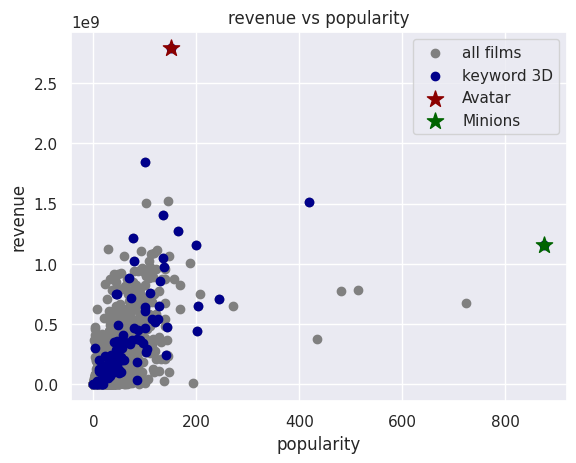

In [ ]:
plt.title('revenue vs popularity')
plt.scatter(df.popularity, df.revenue, color='grey', label='all films')
plt.scatter(filtered_df.popularity, filtered_df.revenue, color='darkblue', label='keyword 3D')
plt.scatter(filtered_df[df.revenue==df.revenue.max()].popularity, filtered_df[df.revenue==df.revenue.max()].revenue, color='darkred', marker='*', s=150, label='Avatar')
plt.scatter(filtered_df[df.popularity==df.popularity.max()].popularity, filtered_df[df.popularity==df.popularity.max()].revenue, color='darkgreen', marker='*', s=150, label='Minions')
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.legend()
plt.show()